## Analisi Tracks

In [2]:
%matplotlib inline
#!pip install python-dotenv
#!pip install pydot
import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import librosa
import librosa.display

import utils

plt.rcParams['figure.figsize'] = (17, 5)

In [3]:
tracks = utils.load('data/fma_metadata/tracks.csv')

tracks.shape

(106574, 52)

In [4]:
tracks.head()


album                                                          \
         comments        date_created date_released engineer favorites id   
track_id                                                                    
2               0 2008-11-26 01:44:45    2009-01-05      NaN         4  1   
3               0 2008-11-26 01:44:45    2009-01-05      NaN         4  1   
5               0 2008-11-26 01:44:45    2009-01-05      NaN         4  1   
10              0 2008-11-26 01:45:08    2008-02-06      NaN         4  6   
20              0 2008-11-26 01:45:05    2009-01-06      NaN         2  4   

                                                                           \
                                        information listens producer tags   
track_id                                                                    
2                                           <p></p>    6073      NaN   []   
3                                           <p></p>    6073      NaN   []   
5                                           <p></p>    6073      NaN   []   
10                                              NaN   47632      NaN   []   
20        <p> "spiritual songs" from Nicky Cook</p>    2710      NaN   []   

          ...       track                         \
          ... information interest language_code   
track_id  ...                                      
2         ...         NaN     4656            en   
3         ...         NaN     1470            en   
5         ...         NaN     1933            en   
10        ...         NaN    54881            en   
20        ...         NaN      978            en   

                                                                              \
                                                    license listens lyricist   
track_id                                                                       
2         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1293      NaN   
3         Attribution-NonCommercial-ShareAlike 3.0 Inter...     514      NaN   
5         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1151      NaN   
10        Attribution-NonCommercial-NoDerivatives (aka M...   50135      NaN   
20        Attribution-NonCommercial-NoDerivatives (aka M...     361      NaN   

                                                 
         number publisher tags            title  
track_id                                         
2             3       NaN   []             Food  
3             4       NaN   []     Electric Ave  
5             6       NaN   []       This World  
10            1       NaN   []          Freeway  
20            3       NaN   []  Spiritual Level  

[5 rows x 52 columns]

In [5]:
ipd.display(tracks['track'].head())
ipd.display(tracks['album'].head())
ipd.display(tracks['artist'].head())
ipd.display(tracks['set'].head())

,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
track_id,,,,,,,,,,,,,,,,,,,,
2,256000,0,NaN,2008-11-26 01:48:12,2008-11-26,168,2,Hip-Hop,[21],[21],NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
3,256000,0,NaN,2008-11-26 01:48:14,2008-11-26,237,1,Hip-Hop,[21],[21],NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
5,256000,0,NaN,2008-11-26 01:48:20,2008-11-26,206,6,Hip-Hop,[21],[21],NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
10,192000,0,Kurt Vile,2008-11-25 17:49:06,2008-11-26,161,178,Pop,[10],[10],NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
20,256000,0,NaN,2008-11-26 01:48:56,2008-01-01,311,0,NaN,"[76, 103]","[17, 10, 76, 103]",NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level


,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type
track_id,,,,,,,,,,,,,
2,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album
3,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album
5,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album
10,0,2008-11-26 01:45:08,2008-02-06,NaN,4,6,NaN,47632,NaN,[],Constant Hitmaker,2,Album
20,0,2008-11-26 01:45:05,2009-01-06,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,[],Niris,13,Album


,active_year_begin,active_year_end,associated_labels,bio,comments,date_created,favorites,id,latitude,location,longitude,members,name,related_projects,tags,website,wikipedia_page
track_id,,,,,,,,,,,,,,,,,
2,2006-01-01,NaT,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,[awol],http://www.AzillionRecords.blogspot.com,NaN
3,2006-01-01,NaT,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,[awol],http://www.AzillionRecords.blogspot.com,NaN
5,2006-01-01,NaT,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,[awol],http://www.AzillionRecords.blogspot.com,NaN
10,NaT,NaT,"Mexican Summer, Richie Records, Woodsist, Skul...","<p><span style=""font-family:Verdana, Geneva, A...",3,2008-11-26 01:42:55,74,6,NaN,NaN,NaN,"Kurt Vile, the Violators",Kurt Vile,NaN,"[philly, kurt vile]",http://kurtvile.com,NaN
20,1990-01-01,2011-01-01,NaN,<p>Songs written by: Nicky Cook</p>\n<p>VOCALS...,2,2008-11-26 01:42:52,10,4,51.895927,Colchester England,0.891874,Nicky Cook\n,Nicky Cook,NaN,"[instrumentals, experimental pop, post punk, e...",NaN,NaN


,split,subset
track_id,,
2,training,small
3,training,medium
5,training,small
10,training,small
20,training,large


In [6]:
ipd.display(tracks['track'].shape)
ipd.display(tracks['album'].shape)
ipd.display(tracks['artist'].shape)
ipd.display(tracks['set'].shape)

(106574, 20)

(106574, 13)

(106574, 17)

(106574, 2)

Tabella composta da 52 attributi, suddivisi in 4 sotto-settori con info diverse:
"track" contiene 20 campi, 
"album" 13 campi, 
"artist" 17 campi, 
"set" 2 campi

## Campi Track

In [7]:
tracks['track']

,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
track_id,,,,,,,,,,,,,,,,,,,,
2,256000,0,NaN,2008-11-26 01:48:12,2008-11-26,168,2,Hip-Hop,[21],[21],NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
3,256000,0,NaN,2008-11-26 01:48:14,2008-11-26,237,1,Hip-Hop,[21],[21],NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
5,256000,0,NaN,2008-11-26 01:48:20,2008-11-26,206,6,Hip-Hop,[21],[21],NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
10,192000,0,Kurt Vile,2008-11-25 17:49:06,2008-11-26,161,178,Pop,[10],[10],NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
20,256000,0,NaN,2008-11-26 01:48:56,2008-01-01,311,0,NaN,"[76, 103]","[17, 10, 76, 103]",NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155316,320000,0,NaN,2017-03-30 15:23:34,NaT,162,1,Rock,[25],"[25, 12]",NaN,122,NaN,Creative Commons Attribution-NonCommercial-NoD...,102,NaN,3,NaN,[],The Auger
155317,320000,0,NaN,2017-03-30 15:23:36,NaT,217,1,Rock,[25],"[25, 12]",NaN,194,NaN,Creative Commons Attribution-NonCommercial-NoD...,165,NaN,4,NaN,[],Let's Skin Ruby
155318,320000,0,NaN,2017-03-30 15:23:37,NaT,404,2,Rock,[25],"[25, 12]",NaN,214,NaN,Creative Commons Attribution-NonCommercial-NoD...,168,NaN,6,NaN,[],My House Smells Like Kim Deal/Pulp


In [8]:
tracks['track'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106574 entries, 2 to 155320
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   bit_rate       106574 non-null  int64         
 1   comments       106574 non-null  int64         
 2   composer       3670 non-null    object        
 3   date_created   106574 non-null  datetime64[ns]
 4   date_recorded  6159 non-null    datetime64[ns]
 5   duration       106574 non-null  int64         
 6   favorites      106574 non-null  int64         
 7   genre_top      49598 non-null   category      
 8   genres         106574 non-null  object        
 9   genres_all     106574 non-null  object        
 10  information    2349 non-null    object        
 11  interest       106574 non-null  int64         
 12  language_code  15024 non-null   object        
 13  license        106487 non-null  category      
 14  listens        106574 non-null  int64         
 15  

In [8]:
tracks['track'].isnull().sum() 

bit_rate              0
comments              0
composer         102904
date_created          0
date_recorded    100415
duration              0
favorites             0
genre_top         56976
genres                0
genres_all            0
information      104225
interest              0
language_code     91550
license              87
listens               0
lyricist         106263
number                0
publisher        105311
tags                  0
title                 1
dtype: int64

In [9]:
tracks['track'].describe() 


,bit_rate,comments,duration,favorites,interest,listens,number
count,106574.000000,106574.000000,106574.000000,106574.000000,1.065740e+05,106574.000000,106574.000000
mean,263274.695048,0.031621,277.849100,3.182521,3.541310e+03,2329.353548,8.260945
std,67623.443584,0.321993,305.518553,13.513820,1.901743e+04,8028.070647,15.243271
min,-1.000000,0.000000,0.000000,0.000000,2.000000e+00,0.000000,0.000000
25%,192000.000000,0.000000,149.000000,0.000000,5.990000e+02,292.000000,2.000000
50%,299914.000000,0.000000,216.000000,1.000000,1.314000e+03,764.000000,5.000000
75%,320000.000000,0.000000,305.000000,3.000000,3.059000e+03,2018.000000,9.000000
max,448000.000000,37.000000,18350.000000,1482.000000,3.293557e+06,543252.000000,255.000000


In [10]:
track=tracks['track'] 

## bit rate

In [11]:
track['bit_rate'].value_counts()

320000    51918
256000    17211
192000    12876
128000     6119
160000     3859
          ...  
256023        1
253974        1
178175        1
319410        1
206885        1
Name: bit_rate, Length: 12054, dtype: int64

In [12]:
51918+17211+12876+6119+3859

91983

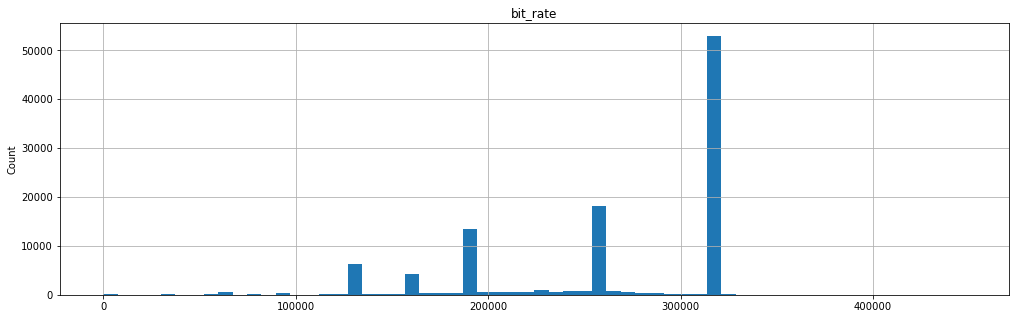

In [13]:
#plt.figure(figsize=(20, 15))

track['bit_rate'].hist(bins=60)
plt.title("bit_rate")
plt.xlabel('')
plt.ylabel('Count')

plt.show()

Il bitrate è la quantità di dati consumati per trasmettere un flusso audio nell'unità di tempo. Quindi, più alto è il bitrate della traccia, più spazio occupa sul computer. D'altra parte, considerando lo stesso formato, un bitrate più alto implica una migliore qualità del suono. 

variabile numerica discreta

0 Null Value

Picchi in questi 5 valori che rappresentano 91983 su 106574 record, 86% del totale:

320000    51918

256000    17211

192000    12876

128000     6119

160000     3859



## comments

In [14]:
track['comments'].value_counts()

0     104423
1       1508
2        415
3        133
4         40
5         19
6         10
7          5
8          5
9          4
10         3
12         2
16         2
30         1
11         1
19         1
24         1
37         1
Name: comments, dtype: int64

Riporta il numero di commenti ricevuti dalla track. 

variabile numerica discreta

0 null value

104423 su 106574 record sono con valore zero, cioè il 98%

## composer

In [15]:
x=track['composer'].value_counts()
x

konstantin trokai                                                       541
Chad Crouch                                                             465
J.S. Bach                                                               346
konstantin trokay                                                       223
Chris Zabriskie                                                          89
                                                                       ... 
LMM 2.6 - Frequency Histograms for Predictor Variables (August 2009)      1
Dan Tapper                                                                1
Unknown                                                                   1
Sam Copp                                                                  1
8 Bit Weapon                                                              1
Name: composer, Length: 505, dtype: int64

In [16]:
df = pd.DataFrame(x, columns = ['composer']) 
df2=pd.DataFrame(df.loc[df.composer >10])
df2

,composer
konstantin trokai,541
Chad Crouch,465
J.S. Bach,346
konstantin trokay,223
Chris Zabriskie,89
Jared C. Balogh,85
Shadow Entity Wizard,69
Eddie Palmer,48
Apache Tomcat,44
Franz Joseph Haydn,44


In [17]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, konstantin trokai to Melodie Provenzano
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   composer  51 non-null     int64
dtypes: int64(1)
memory usage: 816.0+ bytes


Attributo categorico

102904 valori null su 106574 record, 97% del totale

505 compositori diversi per i 3670 record che non hanno valore null, 51 compositori hanno più di 10 tracks nel database



## date_created

In [18]:
track['date_created'].value_counts()

2009-06-25 11:36:04    4
2009-04-20 22:30:54    4
2009-05-05 09:31:42    4
2009-03-05 09:45:49    4
2009-04-30 15:22:50    4
                      ..
2011-02-02 12:51:52    1
2013-06-17 09:09:48    1
2016-06-17 02:18:11    1
2010-12-10 17:34:19    1
2012-07-30 23:33:04    1
Name: date_created, Length: 86169, dtype: int64

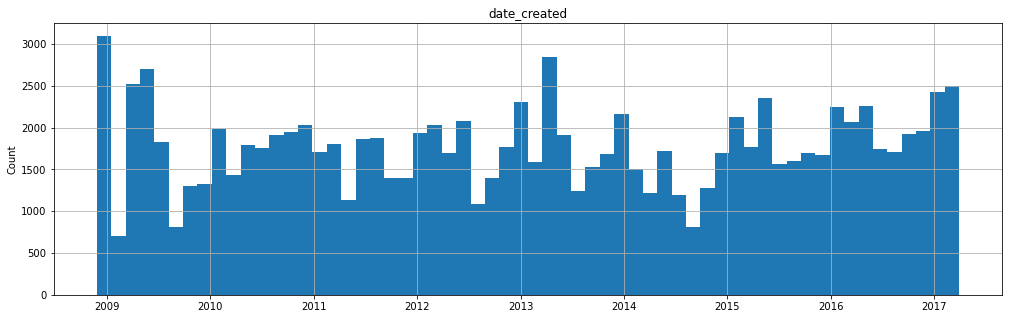

In [19]:
track['date_created'].hist(bins=60)
plt.title("date_created")
plt.xlabel('')
plt.ylabel('Count')

plt.show()

data di inserimento della track nel database, attributo espresso come date time con data e ora

no null value

valori ben distribuiti tra il 2008 e il 2017

## date_recorded

In [20]:
track['date_recorded'].value_counts()

2008-11-26    700
1997-01-01    141
2003-01-01    124
2006-01-01    110
2008-12-05    105
             ... 
2003-09-13      1
2009-12-17      1
2004-04-28      1
2012-03-04      1
2006-07-15      1
Name: date_recorded, Length: 773, dtype: int64

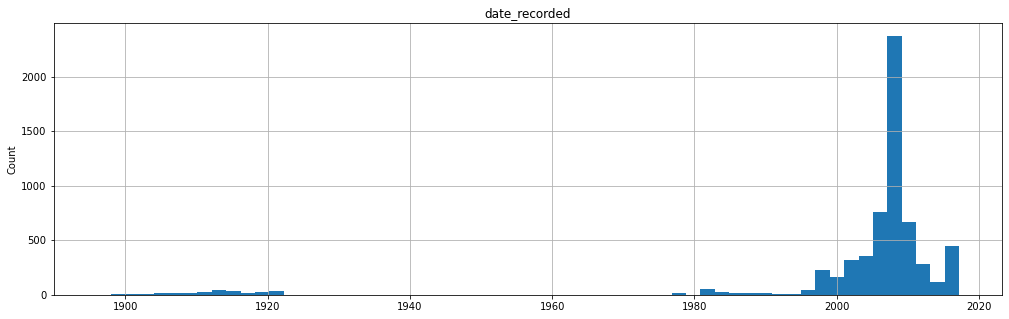

In [21]:
track['date_recorded'].hist(bins=60)
plt.title("date_recorded")
plt.xlabel('')
plt.ylabel('Count')

plt.show()

In [22]:
track['date_recorded_year'] = [d.year for d in pd.to_datetime(track['date_recorded'])]

<ipython-input-22-5c823bbf583c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track['date_recorded_year'] = [d.year for d in pd.to_datetime(track['date_recorded'])]


In [23]:
track['date_recorded_year'].value_counts()

2008.0    1952
2009.0     608
2005.0     429
2007.0     354
2016.0     327
          ... 
1992.0       1
1955.0       1
1989.0       1
1980.0       1
1896.0       1
Name: date_recorded_year, Length: 67, dtype: int64

In [24]:
min(track['date_recorded_year'])

1896.0

In [25]:
max(track['date_recorded_year'])

2017.0

In [26]:
del track['date_recorded_year']

Anno di registrazione della track

attributo date time, va dal 1896 al 2017

100415 null value su 106574 record, 94% del totale

picco di 1952 record su 6159 not null, nell'anno 2008

## duration

In [27]:
x=track['duration'].value_counts()
x

180     595
192     520
240     510
60      506
182     472
       ... 
2078      1
2014      1
1758      1
1694      1
2846      1
Name: duration, Length: 2246, dtype: int64

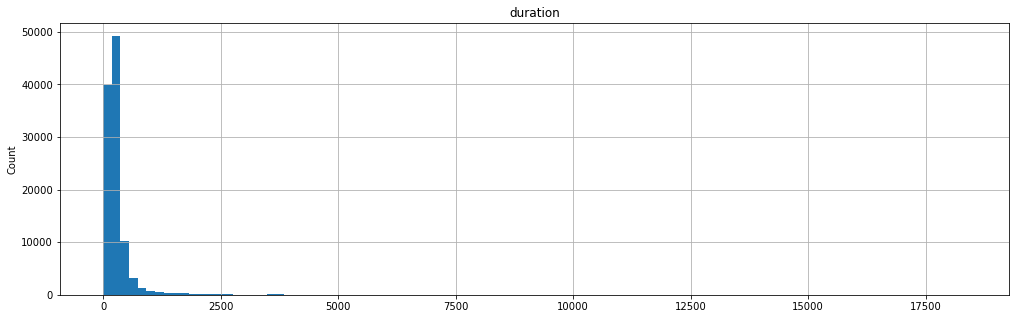

In [28]:
track['duration'].hist(bins=100)
plt.title("duration")
plt.xlabel('')
plt.ylabel('Count')

plt.show()

In [29]:
df = pd.DataFrame(track['duration'], columns = ['duration']) 
df2=pd.DataFrame(df.loc[df.duration <1000])
df2

,duration
track_id,
2,168
3,237
5,206
10,161
20,311
...,...
155316,162
155317,217
155318,404


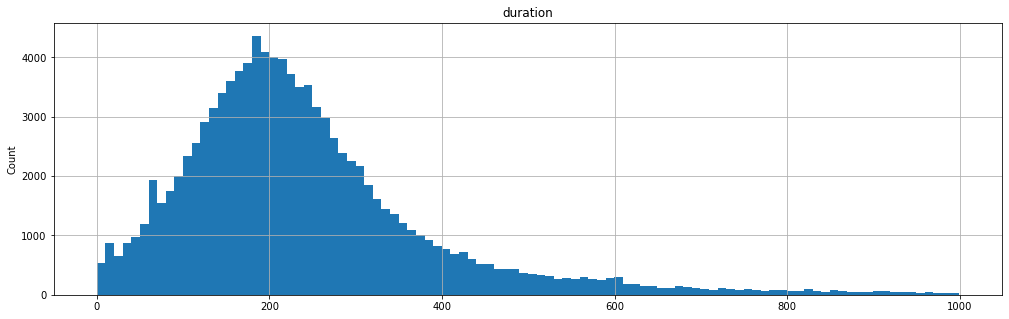

In [30]:
df2['duration'].hist(bins=100)
plt.title("duration")
plt.xlabel('')
plt.ylabel('Count')

plt.show()

duration è la durata della track in secondi

attributo numerico discreto 
 
not null value 

gaussiana ben evidente con picco a 180 secondi se togliamo i valori sopra mille

## favorites

In [31]:
track['favorites'].value_counts()

0      41979
1      23666
2      12488
3       7324
4       4631
       ...  
161        1
288        1
479        1
221        1
157        1
Name: favorites, Length: 243, dtype: int64

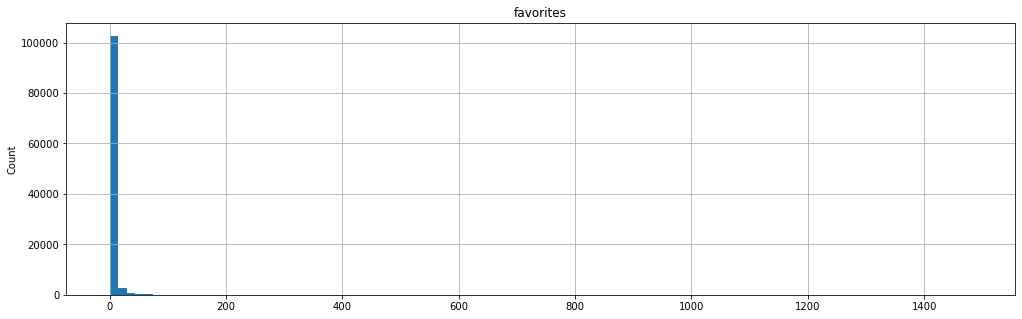

In [32]:
track['favorites'].hist(bins=100)
plt.title("favorites")
plt.xlabel('')
plt.ylabel('Count')

plt.show()

In [33]:
max(track['favorites'])

1482

In [34]:
df = pd.DataFrame(track['favorites'], columns = ['favorites']) 
df2=pd.DataFrame(df.loc[df.favorites >20])
df2

,favorites
track_id,
10,178
236,24
255,24
459,45
461,26
...,...
150281,24
150282,22
152480,22


In [35]:
df2['favorites'].value_counts()

21     190
22     152
24     144
23     133
26     106
      ... 
432      1
424      1
422      1
412      1
554      1
Name: favorites, Length: 222, dtype: int64

favorites indica quanti utenti hanno scelto una track come favorita

attributo numerico discreto

not null value 

solo 2447 tracks sono state selezionate come favorite da più di 20 utenti

## information

In [36]:
track['information'].value_counts()

<p><a href="http://www.myspace.com/theshamblers">The Shamblers</a> shambled down from Bay Ridge, Brooklyn to grace us with a live performance last Wednesday.&nbsp; Led by husband/wife team of Peter and Jess Speer, and ably augmented by drummer Ben Truesdale, the Shamblers brought their blend of Beat Happening/Home Blitz pop roughness plus classic garage punk action with lyrics to match.&nbsp; More info at <a href="http://www.colonialrecordingsusa.com/">their label site</a> (where you can purchase their 100-song mp3 album) and <a href="http://theshamblers.blogspot.com/">their blog</a>.&nbsp; The full set, plus two FCC-unfriendly bonus tracks found below.&nbsp; Engineered by Trent Wolbe.&nbsp; You've been shambled.</p>\n<p><a href="http://blog.wfmu.org/freeform/2008/07/the-shamblers-l.html" target="_blank">http://blog.wfmu.org/freeform/2008/07/the-shamblers-l.html</a></p>\n<p><a href="http://www.wfmu.org/playlists/shows/27951" target="_blank">http://www.wfmu.org/playlists/shows/27951</a>

information sono riportate info varie sulla track in formato html 

attributo categorico

104225 valori null

## interest

In [37]:
track['interest'].value_counts()

320      74
302      71
326      71
503      71
342      71
         ..
63682     1
37071     1
18644     1
8409      1
8228      1
Name: interest, Length: 14396, dtype: int64

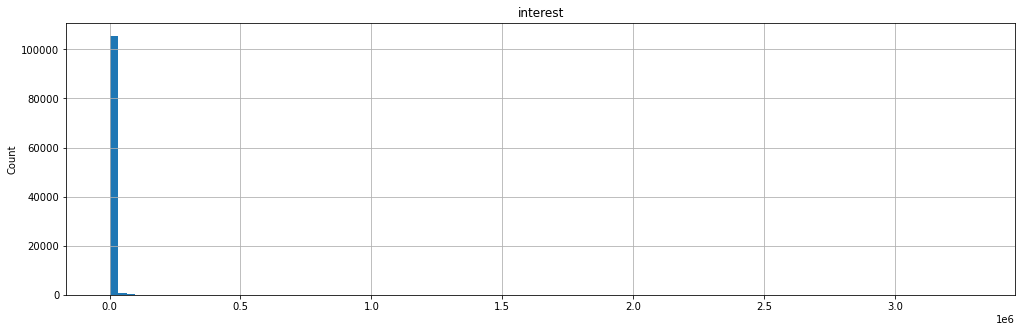

In [38]:
track['interest'].hist(bins=100)
plt.title("interest")
plt.xlabel('')
plt.ylabel('Count')

plt.show()

In [39]:
df = pd.DataFrame(track['interest'], columns = ['interest']) 
df2=pd.DataFrame(df.loc[df.interest >5000])
df2

,interest
track_id,
10,54881
182,5990
211,16106
236,11240
255,5585
...,...
153861,5077
153934,5085
154275,7421


interest indica quanti utenti hanno selezionato una track come interessante

attributo numerico discreto

not null value

solo 15626 tracks sono state selezionate come interessanti da più di 5000 utenti



## language_code

In [40]:
track['language_code'].value_counts()

en    14255
es      204
fr      191
pt       81
de       68
ru       30
it       28
tr       25
sr       23
ar       12
he       12
pl       12
bg        7
ee        7
el        7
fi        6
ja        6
sw        6
nl        5
cs        5
hi        3
zh        3
id        3
hy        2
az        2
ms        2
vi        2
lt        1
my        1
ko        1
la        1
tw        1
no        1
gu        1
th        1
uz        1
ka        1
eu        1
uk        1
ha        1
ty        1
bm        1
tl        1
sk        1
Name: language_code, dtype: int64

language_code dovrebbe essere la lingua della track

attributo categorico

91550 null value

14255 record = en

## license 

In [41]:
track['license'].value_counts()

Attribution-Noncommercial-Share Alike 3.0 United States                          19250
Attribution-NonCommercial-NoDerivatives (aka Music Sharing) 3.0 International    17732
Attribution-NonCommercial-ShareAlike 3.0 International                           15260
Creative Commons Attribution-NonCommercial-NoDerivatives 4.0                     12133
Attribution-Noncommercial-No Derivative Works 3.0 United States                  10584
                                                                                 ...  
Attribution-Noncommercial-NoDerivatives 2.0 Belgium                                  1
Attribution-Noncommercial 2.5 Brazil                                                 1
Attribution-Noncommercial-No Derivative Works 2.5 Sweden                             1
Attribution-Noncommercial-No Derivative Works 2.5 Denmark                            1
Attribution-Noncommercial-No Derivative Works 2.5 Portugal                           1
Name: license, Length: 113, dtype: int64

attributo che indica la licenza della track

87 null value

113 diverse licenze, ma le prime 5 che raggruppano più di 73 mila record

## listens

In [42]:
track['listens'].value_counts()

96       140
97       136
141      133
112      130
152      129
        ... 
8742       1
10791      1
23081      1
8806       1
0          1
Name: listens, Length: 12035, dtype: int64

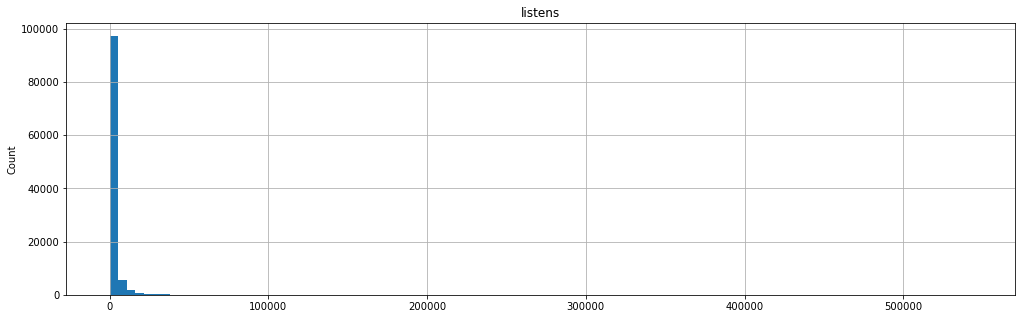

In [43]:
track['listens'].hist(bins=100)
plt.title("listens")
plt.xlabel('')
plt.ylabel('Count')

plt.show()

In [44]:
df = pd.DataFrame(track['listens'], columns = ['listens']) 
df2=pd.DataFrame(df.loc[df.listens < 5000])
df2

,listens
track_id,
2,1293
3,514
5,1151
20,361
26,193
...,...
155316,102
155317,165
155318,168


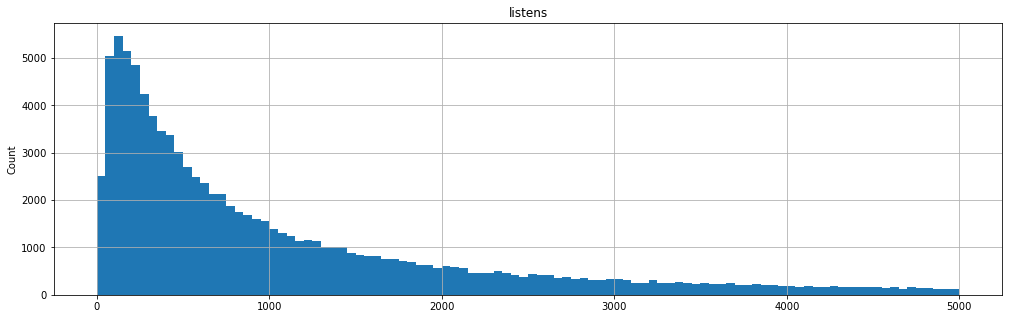

In [45]:
df2['listens'].hist(bins=100)
plt.title("listens")
plt.xlabel('')
plt.ylabel('Count')

plt.show()

listens attributo che indica quante volte è stata ascoltata una track

attributo numerico discreto

not null value

99 track presentano più di 100000 ascolti, 96268 meno di 5000

## lyricist

In [46]:
track['lyricist'].value_counts()

Apache Tomcat              44
Wayne Myers                24
Shadow Entity Wizard       19
Wesley Willis              18
Kathleen Martin            14
                           ..
Tom Ray / Mark Whitcomb     1
Notes                       1
Matthew McGilvery           1
meg baird                   1
Daniel Kisters              1
Name: lyricist, Length: 66, dtype: int64

attributo che indica il nome del cantante lirico

106263 null value su 106574 record

## number

In [47]:
track['number'].value_counts()

1      12419
2      11214
3      10379
4       9551
5       8471
       ...  
175        1
154        1
218        1
229        1
158        1
Name: number, Length: 246, dtype: int64

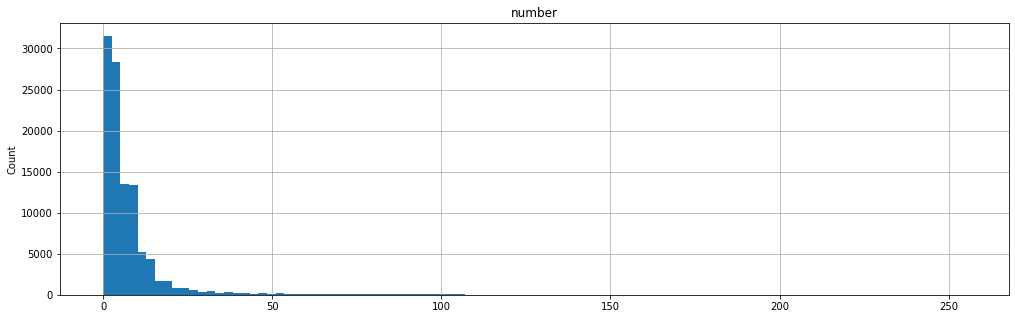

In [48]:
track['number'].hist(bins=100)
plt.title("number")
plt.xlabel('')
plt.ylabel('Count')

plt.show()

In [49]:
df = pd.DataFrame(track['number'], columns = ['number']) 
df2=pd.DataFrame(df.loc[df.number < 20])
df2

,number
track_id,
2,3
3,4
5,6
10,1
20,3
...,...
155316,3
155317,4
155318,6


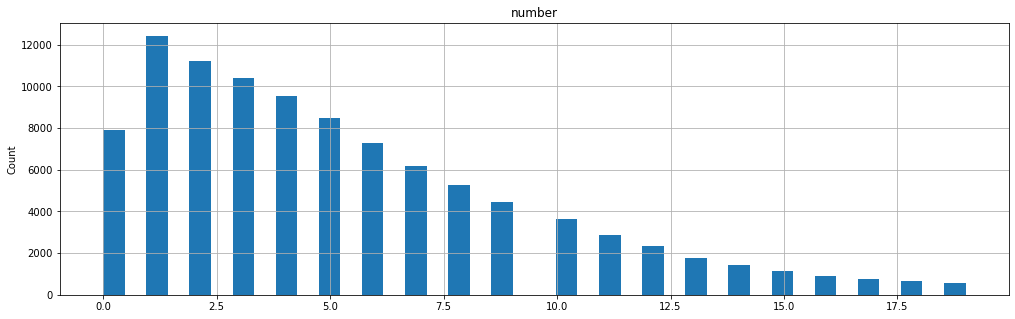

In [50]:
df2['number'].hist(bins=40)
plt.title("number")
plt.xlabel('')
plt.ylabel('Count')

plt.show()

number dovrebbe essere il numero della track di un determinato album

attributo numerico discreto

not null value

99211 presentano valore minore di 20

picco con oltre 12000 record su valore 1

## publisher

In [51]:
track['publisher'].value_counts()

Victrola Dog (ASCAP)                           465
You've Been a Wonderful Laugh Track (ASCAP)     84
Section 27                                      73
www.headphonica.com                             55
Studio 11                                       43
                                              ... 
Everlasting 3056                                 1
Columbia A 2283                                  1
Victor 18900                                     1
der kleine gründe würfel                         1
monobomb records                                 1
Name: publisher, Length: 135, dtype: int64

publisher rappresenta la casa editrice

attributo categorico 

105311 valori null su 106574 record

## tags

In [52]:
track['tags'].value_counts()

[]                                                                                                                                                         83078
[interiors c1964, existential, hardcore-punk, pop-punk, punk-rock, internet boyfriend, rew starr, public domain, creative commons, microsong challenge]      310
[classwar karaoke]                                                                                                                                           238
[all styles experimental]                                                                                                                                    215
[improvisation, not normal music, all styles experimental]                                                                                                   195
                                                                                                                                                           ...  
[psych-rock, rock, pop]           

## title

In [53]:
track['title'].value_counts()

Untitled                                     298
Into Infinity "ear" loop                     150
Intro                                        115
Interview                                     92
Chicken and Cheese 2 (Foot Village cover)     49
                                            ... 
Quixote Daydreams of Dulcinea                  1
Inaugural Voyage                               1
Рок-н-ролл читатели                            1
A Tree & a Stone                               1
Man is a Person                                1
Name: title, Length: 94986, dtype: int64

In [54]:
df = pd.DataFrame(track['title'].value_counts(), columns = ['title']) 
df2=pd.DataFrame(df.loc[df.title < 2])
df2

,title
Shaded Shapes,1
Ta te tí,1
side b,1
3) BaleneSirene,1
spruchnummer 1,1
...,...
Quixote Daydreams of Dulcinea,1
Inaugural Voyage,1
Рок-н-ролл читатели,1
A Tree & a Stone,1


title è il titolo della track

attributo categorico

1 valore null

88713 record con title unico distinto

298 con valore untitle

115 con valore intro

## genre_top

In [55]:
track['genre_top'].value_counts()

Rock                   14182
Experimental           10608
Electronic              9372
Hip-Hop                 3552
Folk                    2803
Pop                     2332
Instrumental            2079
International           1389
Classical               1230
Jazz                     571
Old-Time / Historic      554
Spoken                   423
Country                  194
Soul-RnB                 175
Blues                    110
Easy Listening            24
Name: genre_top, dtype: int64

genre_top indica il genere root della track

attributo categorico

56976 missing value

i missing value sono assegnati quando una track ha più di un genere root

In [1]:
106574-56976

49598

## genres

In [56]:
track['genres'].value_counts()

[21]                    2735
[15]                    2689
[]                      2231
[12]                    1896
[1, 30, 38, 41, 247]    1633
                        ... 
[26, 42, 1235]             1
[64, 362]                  1
[20, 42]                   1
[41, 66, 85, 88]           1
[311, 456]                 1
Name: genres, Length: 4768, dtype: int64

genres indica il genere della track, ogni valore è un array di generi

0 missing value

2231 sono array vuoti

In [57]:
## genres_all

In [58]:
track['genres_all'].value_counts()

[21]                            2735
[15]                            2689
[]                              2231
[12]                            1896
[1, 38, 41, 247, 30]            1633
                                ... 
[3, 5, 15, 659, 286]               1
[113, 26, 12, 15]                  1
[66, 5, 12, 443, 27]               1
[66, 12, 109, 89, 25]              1
[580, 38, 15, 1235, 21, 182]       1
Name: genres_all, Length: 4151, dtype: int64

genres_all indica i genere della track nell'albero dal genere specifico della track fino alla radice

ogni valore è un array di generi

0 missing value

2231 sono array vuoti

## CAMPI ALBUM

In [59]:
ipd.display(tracks['album'].head())

,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type
track_id,,,,,,,,,,,,,
2,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album
3,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album
5,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album
10,0,2008-11-26 01:45:08,2008-02-06,NaN,4,6,NaN,47632,NaN,[],Constant Hitmaker,2,Album
20,0,2008-11-26 01:45:05,2009-01-06,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,[],Niris,13,Album


In [60]:
tracks['album'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106574 entries, 2 to 155320
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   comments       106574 non-null  int64         
 1   date_created   103045 non-null  datetime64[ns]
 2   date_released  70294 non-null   datetime64[ns]
 3   engineer       15295 non-null   object        
 4   favorites      106574 non-null  int64         
 5   id             106574 non-null  int64         
 6   information    83149 non-null   category      
 7   listens        106574 non-null  int64         
 8   producer       18060 non-null   object        
 9   tags           106574 non-null  object        
 10  title          105549 non-null  object        
 11  tracks         106574 non-null  int64         
 12  type           100066 non-null  category      
dtypes: category(2), datetime64[ns](2), int64(5), object(4)
memory usage: 10.5+ MB


In [61]:
tracks['album'].isnull().sum()

comments             0
date_created      3529
date_released    36280
engineer         91279
favorites            0
id                   0
information      23425
listens              0
producer         88514
tags                 0
title             1025
tracks               0
type              6508
dtype: int64

In [62]:
tracks['album'].describe()

,comments,favorites,id,listens,tracks
count,106574.000000,106574.000000,106574.000000,1.065740e+05,106574.000000
mean,0.394946,1.286927,12826.933914,3.212031e+04,19.721452
std,2.268915,3.133035,6290.261805,1.478532e+05,39.943673
min,-1.000000,-1.000000,-1.000000,-1.000000e+00,-1.000000
25%,0.000000,0.000000,7793.000000,3.361000e+03,7.000000
50%,0.000000,0.000000,13374.000000,8.982000e+03,11.000000
75%,0.000000,1.000000,18203.000000,2.363500e+04,17.000000
max,53.000000,61.000000,22940.000000,3.564243e+06,652.000000


In [63]:
album=tracks['album']

## comments

In [64]:
album['comments'].value_counts()

 0     84660
 1     10858
-1      3529
 2      3442
 3      1669
 4       737
 5       384
 6       341
 53      139
 14      135
 8       133
 7       132
 11      125
 10      117
 9        91
 17       71
 13        9
 12        2
Name: comments, dtype: int64

comments riporta il numero di commenti ricevuti da ogni album

attributo numerico discreto

3529 record hanno valore -1

non si capisce se c'è un collegamento con comments di track

## id

In [66]:
album['id'].value_counts()

-1        1025
 17509     310
 2275      151
 21841     150
 13010     139
          ... 
 6138        1
 2801        1
 17428       1
 7307        1
 18718       1
Name: id, Length: 14854, dtype: int64

In [67]:
df = pd.DataFrame(album['id'], columns = ['id']) 
df2=pd.DataFrame(df.loc[df.id == 17509])
df2

,id
track_id,
113593,17509
113650,17509
113651,17509
113657,17509
113658,17509
...,...
115512,17509
115513,17509
115515,17509


id attributo che rappresenta l'id dell'album. 14854 album diversi ci sono (uno è segnato con -1, non è un album)

Ci sono 310 track che fanno parte dello stesso album

1025 record con valore -1 non hanno un album, hanno infatti title null

## date_created 

In [68]:
album['date_created'].value_counts()

2015-01-26 13:04:57    310
2009-03-30 16:18:08    151
2016-11-12 12:34:46    150
2012-12-06 16:45:52    139
2009-01-02 21:41:31    138
                      ... 
2010-09-28 12:57:08      1
2011-12-23 08:07:13      1
2013-05-28 13:18:56      1
2008-11-26 02:54:35      1
2009-04-09 12:10:48      1
Name: date_created, Length: 14340, dtype: int64

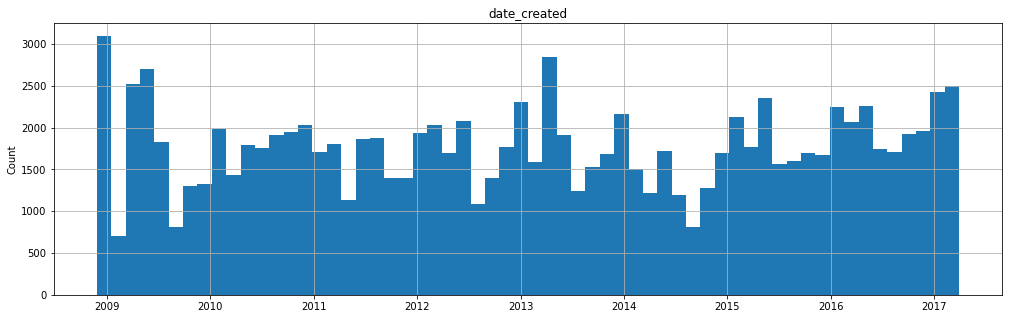

In [69]:
track['date_created'].hist(bins=60)
plt.title("date_created")
plt.xlabel('')
plt.ylabel('Count')

plt.show()


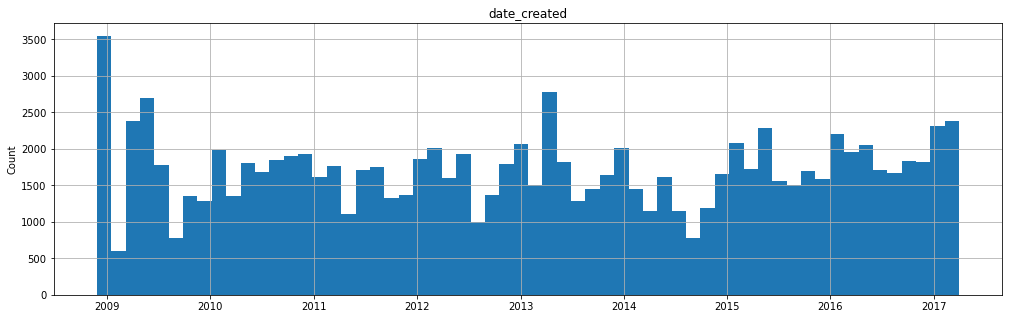

In [70]:
album['date_created'].hist(bins=60)
plt.title("date_created")
plt.xlabel('')
plt.ylabel('Count')

plt.show()


data_createde attributo che indica la data di inserimento nel database dell'album

tipo datetime

3529 null value

## date_released    

In [71]:
album['date_released'].value_counts()

2008-01-01    667
2010-01-01    564
2007-01-01    549
2009-01-01    464
2006-01-01    330
             ... 
2012-01-29      1
2011-01-26      1
2016-09-18      1
1996-03-01      1
2007-03-10      1
Name: date_released, Length: 3669, dtype: int64

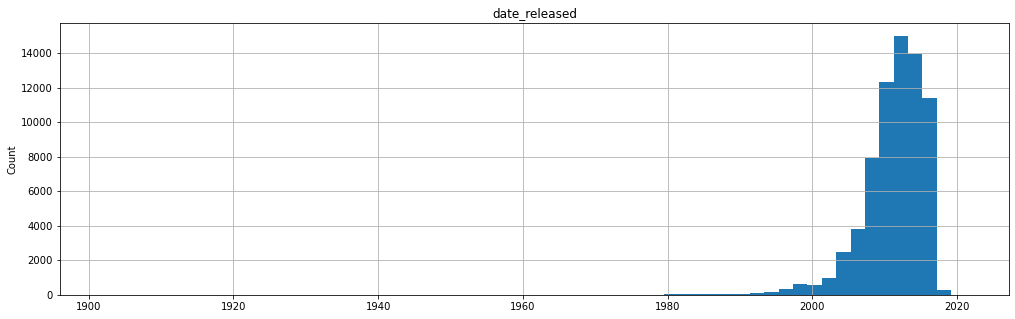

In [72]:
album['date_released'].hist(bins=60)
plt.title("date_released")
plt.xlabel('')
plt.ylabel('Count')

plt.show()

date_released attributo che indica la data di rilascio dell'album

tipo datetime

36280 null value


## engineer

In [73]:
album['engineer'].value_counts()

Ernie Indradat                    876
Mike Sin                          701
Irene Trudel                      603
Glenn Luttman                     545
Mario Santana                     533
                                 ... 
Nynack                              1
Evan Muse                           1
Bob Wanger                          1
Anthony Allman                      1
Bryan Smith; Kenneth Kirschner      1
Name: engineer, Length: 622, dtype: int64

engineer attributo che indica l'ingegnere acustico dell'album

tipo categorico

91279 null value

## favorites

In [74]:
album['favorites'].value_counts()

 0     53679
 1     23757
 2     10349
 3      5366
-1      3529
 4      2542
 5      1707
 6      1330
 7       942
 8       898
 10      422
 11      373
 12      297
 9       293
 14      159
 13       99
 23       75
 16       74
 19       71
 25       69
 17       66
 18       58
 31       49
 15       41
 55       38
 24       31
 22       29
 20       28
 29       26
 21       20
 28       20
 39       18
 26       15
 40       15
 47       14
 27       12
 61       10
 38       10
 33        9
 60        9
 43        7
 54        7
 37        6
 36        5
Name: favorites, dtype: int64

favorites indica quanti utenti hanno scelto un album come preferito

attributo numerico discreto

3529 value -1 corrispondono agli album con id -1

## information

In [75]:
album['information'].value_counts()

<p class="p1" style="margin: 0px; padding: 8px 0px; font-stretch: normal; font-size: 12px; line-height: 19px; font-family: 'Trebuchet MS', 'Lucida Grande', Arial, sans-serif; color: #222222;"><span class="s1">Get ready, get set, GET SMALL! Get your tiny instruments together (or oversized ones, or ones that are juuuust right), grab a recording device, and add your itty bitty masterpiece(s) to our collection! Every microSong will be licensed under a <a href="http://creativecommons.org/about/cc0">Creative Commons Zero</a> license so that it can be freely used by anyone in a video, remix, extraordinarily brief performance art piece, or whatever else they may choose.</span></p>\n<p class="p1" style="margin: 0px; padding: 8px 0px; font-stretch: normal; font-size: 12px; line-height: 19px; font-family: 'Trebuchet MS', 'Lucida Grande', Arial, sans-serif; color: #222222;"><span class="s1">Songs must be your own work, and must not exceed fifteen (15) seconds in length. We only accept MP3 submissi

information sono riportate info varie sull'album in formato html

attributo categorico

23425 null value

## listens

In [76]:
album['listens'].value_counts()

-1         3529
 325595     310
 97866      151
 70247      150
 30149      142
           ... 
 473          1
 601          1
 10844        1
 6810         1
 2049         1
Name: listens, Length: 10092, dtype: int64

listens attributo che indica quante volte è stata ascoltato un album

attributo numerico discreto

not null value

-1 sta per le track senza album

## producer

In [77]:
album['producer'].value_counts()

Joe Belock            855
Terre T               819
Classwar Karaoke      530
Rob Weisberg          459
Evan "Funk" Davies    441
                     ... 
Robert Lippok           1
Flex Vector             1
Black Ops               1
Jane Shields            1
Andrew Vincent          1
Name: producer, Length: 760, dtype: int64

producer attributo che indica il nome del producer dell'album

attributo categorico

88514 null value


## tags

In [78]:
album['tags'].value_counts()

[]                                                                                                                                                         83549
[interiors c1964, existential, hardcore-punk, pop-punk, punk-rock, internet boyfriend, rew starr, public domain, creative commons, microsong challenge]      310
[classwar karaoke]                                                                                                                                           238
[all styles experimental]                                                                                                                                    215
[improvisation, not normal music, all styles experimental]                                                                                                   195
                                                                                                                                                           ...  
[murmurists, spe_0020, anthony don

tags come valori ha un array di stringhe con parole chiave

83549 record hanno come valore un array vuoto



## title

In [79]:
album['title'].value_counts()

microSong Entries                                              310
Sectioned v4.0                                                 200
Live at the 2014 Golden Festival                               168
INTO INFINITY: an exploration of on and on and on and on...    151
Necktar Volume 6                                               150
                                                              ... 
The Bulgarian Secret Police M&amp;M Torture Trick (Side 1)       1
Live at CKUT on New Shit October 2010                            1
Peyote Road                                                      1
Lighten Up                                                       1
Prelude To An Eon                                                1
Name: title, Length: 14298, dtype: int64

title è il titolo della track

attributo categorico

1025 valore null

14298 record con title unico distinto, gli id diversi sono 14854. Qualcosa non torna del tutto




## tracks

In [80]:
album['tracks'].value_counts()

10     7115
9      6314
8      6241
6      6006
11     5903
       ... 
164      17
82       17
142      16
153      15
149      14
Name: tracks, Length: 115, dtype: int64

In [81]:
df = pd.DataFrame(album['tracks'], columns = ['tracks']) 
df2=pd.DataFrame(df.loc[df.tracks == -1])
df2

,tracks
track_id,
554,-1
555,-1
556,-1
557,-1
558,-1
...,...
155060,-1
155061,-1
155244,-1


tracks indica il numero di tracks per ogni album

attributo numerico discreto

3529 record hanno valore -1

## type

In [82]:
album['type'].value_counts()

Album               87549
Radio Program        6551
Live Performance     5035
Single Tracks         917
Contest                14
Name: type, dtype: int64

attributo type indica il tipo di album

87549 record hanno valore generale 'Album'

6508 null value

## CAMPI ARTIST

In [120]:
tracks['artist'].head()

,active_year_begin,active_year_end,associated_labels,bio,comments,date_created,favorites,id,latitude,location,longitude,members,name,related_projects,tags,website,wikipedia_page
track_id,,,,,,,,,,,,,,,,,
2,2006-01-01,NaT,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,[awol],http://www.AzillionRecords.blogspot.com,NaN
3,2006-01-01,NaT,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,[awol],http://www.AzillionRecords.blogspot.com,NaN
5,2006-01-01,NaT,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,[awol],http://www.AzillionRecords.blogspot.com,NaN
10,NaT,NaT,"Mexican Summer, Richie Records, Woodsist, Skul...","<p><span style=""font-family:Verdana, Geneva, A...",3,2008-11-26 01:42:55,74,6,NaN,NaN,NaN,"Kurt Vile, the Violators",Kurt Vile,NaN,"[philly, kurt vile]",http://kurtvile.com,NaN
20,1990-01-01,2011-01-01,NaN,<p>Songs written by: Nicky Cook</p>\n<p>VOCALS...,2,2008-11-26 01:42:52,10,4,51.895927,Colchester England,0.891874,Nicky Cook\n,Nicky Cook,NaN,"[instrumentals, experimental pop, post punk, e...",NaN,NaN


In [85]:
 tracks['artist'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106574 entries, 2 to 155320
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   active_year_begin  22711 non-null   datetime64[ns]
 1   active_year_end    5375 non-null    datetime64[ns]
 2   associated_labels  14271 non-null   object        
 3   bio                71156 non-null   category      
 4   comments           106574 non-null  int64         
 5   date_created       105718 non-null  datetime64[ns]
 6   favorites          106574 non-null  int64         
 7   id                 106574 non-null  int64         
 8   latitude           44544 non-null   float64       
 9   location           70210 non-null   object        
 10  longitude          44544 non-null   float64       
 11  members            46849 non-null   object        
 12  name               106574 non-null  object        
 13  related_projects   13152 non-null   object  

In [86]:
 tracks['artist'].isnull().sum()

active_year_begin     83863
active_year_end      101199
associated_labels     92303
bio                   35418
comments                  0
date_created            856
favorites                 0
id                        0
latitude              62030
location              36364
longitude             62030
members               59725
name                      0
related_projects      93422
tags                      0
website               27318
wikipedia_page       100993
dtype: int64

In [87]:
 tracks['artist'].describe()

,comments,favorites,id,latitude,longitude
count,106574.000000,106574.000000,106574.000000,44544.000000,44544.000000
mean,1.894702,30.041915,12036.770404,39.901626,-38.668642
std,6.297679,100.511408,6881.420867,18.240860,65.237220
min,-1.000000,-1.000000,1.000000,-45.878760,-157.526855
25%,0.000000,1.000000,6443.000000,39.271398,-79.997459
50%,0.000000,5.000000,12029.500000,41.387917,-73.554431
75%,1.000000,16.000000,18011.000000,48.856930,4.351710
max,79.000000,963.000000,24357.000000,67.286005,175.277000


In [88]:
artist=tracks['artist']

## active_year_begin     



In [90]:
artist['active_year_begin'].value_counts()

2007-01-01    1789
2005-01-01    1534
2008-01-01    1468
2006-01-01    1352
2004-01-01    1237
              ... 
1954-01-01       1
1917-01-01       1
1931-01-01       1
1948-01-01       1
1959-01-01       1
Name: active_year_begin, Length: 76, dtype: int64

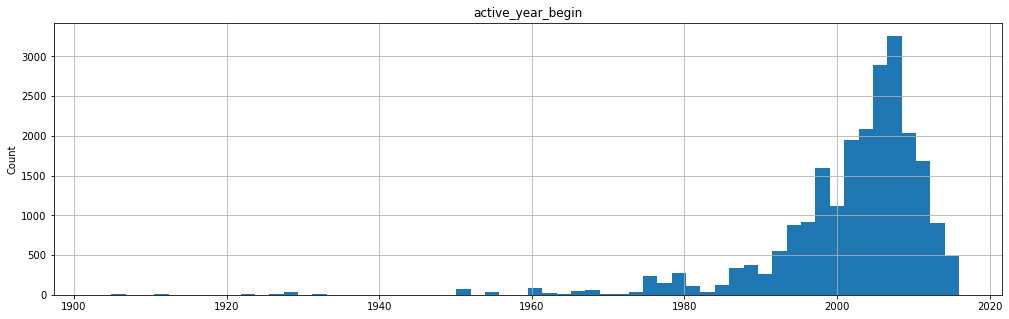

In [91]:
artist['active_year_begin'].hist(bins=60)
plt.title("active_year_begin")
plt.xlabel('')
plt.ylabel('Count')

plt.show()

active_year_begin anno in cui l'artista ha debuttato

distribuzione asimmetrica negativa, moda nel 2007

83863 null value

## active_year_end

In [92]:
artist['active_year_end'].value_counts()

2016-01-01    479
2015-01-01    476
2014-01-01    455
2007-01-01    356
2010-01-01    321
2017-01-01    289
2011-01-01    272
2009-01-01    252
2013-01-01    245
2008-01-01    225
2005-01-01    218
2012-01-01    210
1995-01-01    189
2018-01-01    150
2053-01-01    149
1989-01-01    127
2000-01-01    117
2001-01-01     94
2006-01-01     92
1999-01-01     68
2036-01-01     61
1998-01-01     56
1993-01-01     51
2002-01-01     51
2003-01-01     47
2004-01-01     43
1983-01-01     36
1992-01-01     32
1996-01-01     29
1975-01-01     28
1997-01-01     27
2086-01-01     21
1945-01-01     12
1950-01-01     12
1994-01-01     11
2025-01-01     11
1991-01-01     10
1985-01-01      7
1980-01-01      6
1929-01-01      5
1928-01-01      5
1922-01-01      4
1957-01-01      4
1927-01-01      4
1917-01-01      3
1935-01-01      2
1976-01-01      2
1913-01-01      2
1926-01-01      1
1948-01-01      1
1931-01-01      1
1958-01-01      1
1937-01-01      1
1910-01-01      1
1932-01-01      1
1903-01-01

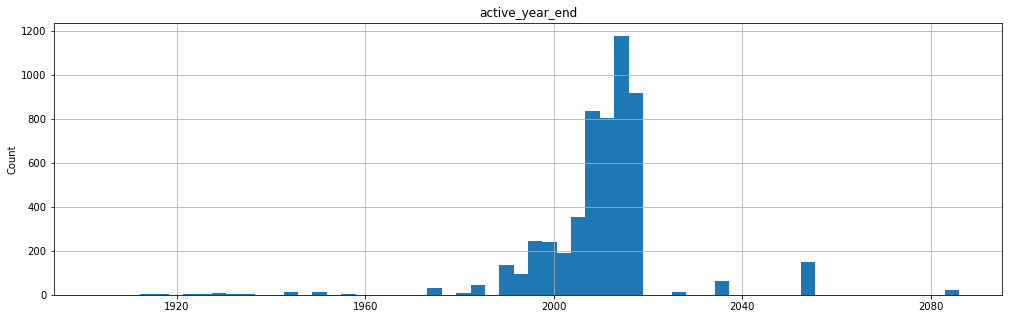

In [93]:
artist['active_year_end'].hist(bins=60)
plt.title("active_year_end")
plt.xlabel('')
plt.ylabel('Count')

plt.show()

active_year_end anno in cui l'artist si è ritirato

101199 null value

## associated_labels

In [95]:
artist['associated_labels'].value_counts()

HUSH Records                                                                                                       604
Care in the Community Recordings, Gagarin Records, Soleilmoon Recordings, Womb Records                             499
eg0cide, Withering Trees, Art1ficial Records, Black Circle Records, Kava Karvup Recordings, Effluvia Recordings    333
Daddy Tank Records                                                                                                 290
Parenthetical Records                                                                                              286
                                                                                                                  ... 
appears courtesy of RCA/ATO Records                                                                                  1
Super 6 Records, \nPharmacom Records, \nSäurebad Records,\nChillzone Records                                         1
Breathmint                                      

associated_labels etichette associate all'artista

92303 null value

## bio                   

In [96]:
artist['bio'].value_counts()

<p><span style="color: #333333; font-family: Georgia, 'Times New Roman', 'Bitstream Charter', Times, serif; font-size: 13px; line-height: 19px; text-align: left;">Kosta T / Konstantin Trokay is a formative Russian musician with an interest in contemporary music, looking for new ways of expressing his particular world view...</span></p>                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

bio biografia in formato html dell'artista

35418 null value

## comments

In [97]:
artist['comments'].value_counts()

 0     70496
 1     12927
 2      6875
 3      3049
 4      2437
 5      1163
 7      1106
 6      1100
-1       856
 12      673
 29      604
 13      570
 8       540
 15      528
 10      491
 11      488
 55      471
 21      433
 18      406
 9       303
 28      248
 32      162
 31      155
 79      109
 14       78
 68       68
 16       62
 17       59
 25       58
 26       30
 35       29
Name: comments, dtype: int64

comments numero di commenti lasciati per ogni artista

70496 record presentano zero commenti

856 presentano -1 commenti 

0 null value

## date_created

In [99]:
artist['date_created'].value_counts()

2013-03-31 02:17:41    745
2010-04-19 14:21:56    604
2008-11-26 02:09:09    499
2015-02-03 12:05:36    416
2009-03-19 12:01:38    371
                      ... 
2016-09-26 08:25:41      1
2012-07-19 13:12:58      1
2014-11-01 19:42:57      1
2009-08-13 08:04:46      1
2013-12-30 17:15:59      1
Name: date_created, Length: 15970, dtype: int64

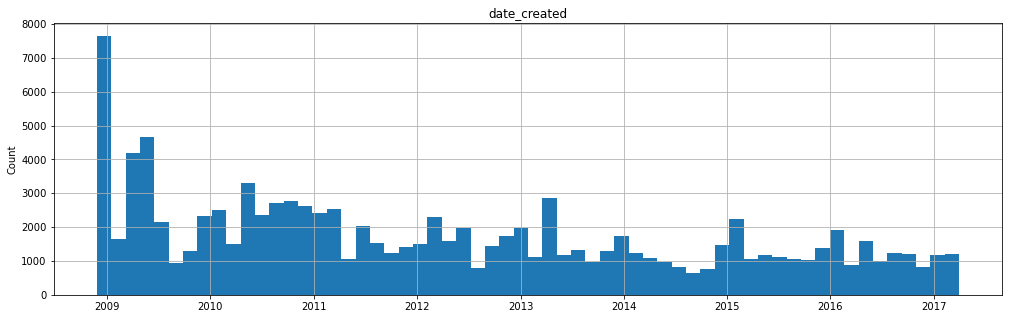

In [100]:
artist['date_created'].hist(bins=60)
plt.title("date_created")
plt.xlabel('')
plt.ylabel('Count')

plt.show()

date_created data in cui l'artista è stato inserito nel database

856 null value 

## favorites

In [102]:
artist['favorites'].value_counts()

0      18056
1      12177
2       8591
3       6533
4       5816
       ...  
61        16
119       15
50        10
74         7
69         7
Name: favorites, Length: 128, dtype: int64

favorites numero di utenti che hanno selezionato l'artista come preferito

0 null value

## id

In [106]:
artist['id'].value_counts()

15891    745
7168     604
129      499
19461    416
2008     371
        ... 
19536      1
22458      1
11356      1
10164      1
2049       1
Name: id, Length: 16341, dtype: int64

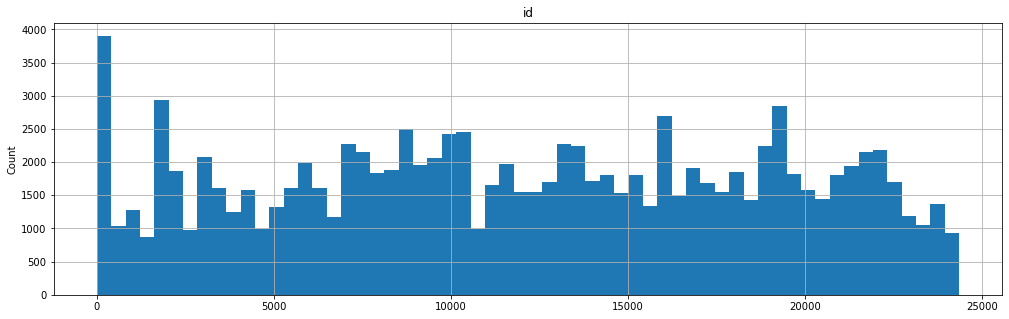

In [107]:
artist['id'].hist(bins=60)
plt.title("id")
plt.xlabel('')
plt.ylabel('Count')

plt.show()

id identificativo artista

il grafico mostra come alcuni artisti presentino più canzoni di altri

0 null value

## latitude

In [108]:
artist['latitude'].value_counts()

 40.650000    1339
 45.523452    1255
 40.692455     976
 40.714550     937
 40.714353     775
              ... 
 55.794941       1
 42.746071       1
 43.250439       1
-35.308235       1
 65.010300       1
Name: latitude, Length: 1306, dtype: int64

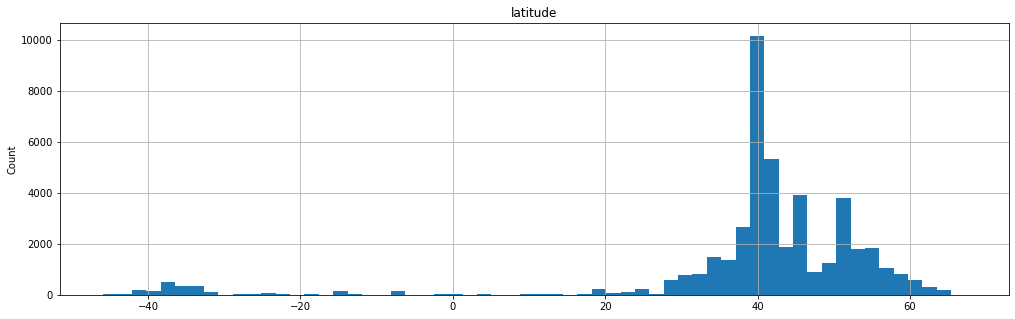

In [109]:
artist['latitude'].hist(bins=60)
plt.title("latitude")
plt.xlabel('')
plt.ylabel('Count')

plt.show()

latitudine di provenienza dell'artista

62030 null value

## longitude

In [111]:
artist['longitude'].value_counts()

-73.950000     1339
-122.676207    1255
-73.990364      976
-74.007124      896
-74.005973      775
               ... 
-97.742561        1
 12.354722        1
-122.661486       1
 27.563100        1
-74.744652        1
Name: longitude, Length: 1296, dtype: int64

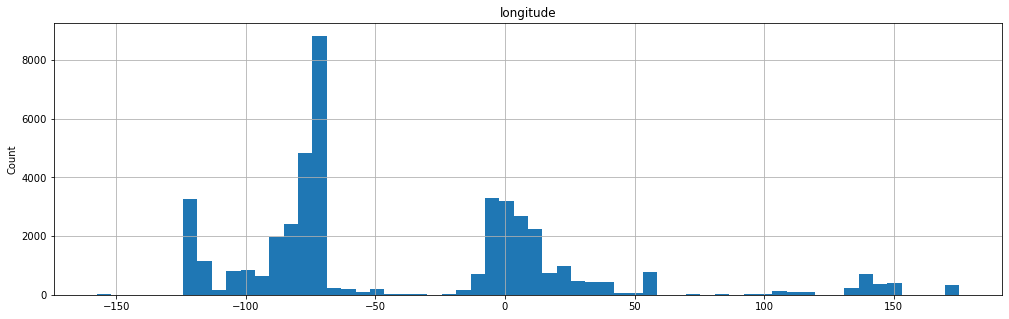

In [113]:
artist['longitude'].hist(bins=60)
plt.title("longitude")
plt.xlabel('')
plt.ylabel('Count')

plt.show()

longitudine di provenienza dell'artista

62030 null value

## location

In [114]:
artist['location'].value_counts()

Brooklyn, NY                  2327
France                        1737
New York, NY                  1218
Chicago, IL                    783
Perm, Russia                   745
                              ... 
Sacramento, California           1
Brisbane and Tokyo               1
Brooklyn & New Jersey            1
Amsterdam, The Netherlands       1
94110                            1
Name: location, Length: 2329, dtype: int64

location città di provenienza dell'artista

36364 null value

## members               

In [116]:
artist['members'].value_counts()

Konstantin Trokay                                                                                                                     745
Chad Crouch                                                                                                                           615
Lee Rosevere                                                                                                                          380
Hollis Smith                                                                                                                          353
Jared C. Balogh                                                                                                                       248
                                                                                                                                     ... 
Chuck Bettis - electronics + throat\nToshio Kajiwara - turntables + electronics\nBarry Weisblat - electronics + home made devices       1
Tuukka Tervo, Jari Koho           

members sembra indicare i nomi dei membri del gruppo se sono più di 1 o del solo artista se è da solo. 
Non torna molro con l'attributo name successivo

59725 null value

## name

In [117]:
artist['name'].value_counts()

Kosta T                              745
Podington Bear                       604
Ergo Phizmiz                         499
Blue Dot Sessions                    416
Lee Rosevere                         371
                                    ... 
Gamaliel                               1
Mat Gabo and Beurklaid                 1
Love Cult & Bedroom Bear               1
Travis Johnson and Jaan Patterson      1
Rejections                             1
Name: name, Length: 16294, dtype: int64

name indica il nome dell'artist

0 null value

## related_projects

In [118]:
artist['related_projects'].value_counts()

Ratatat, Lullatone, Nightmares On Wax, Air, Mouse On Mars, Helios, Goldmund                                                                                                                                         604
The Electric Amygdala\nRockit Maxx                                                                                                                                                                                  371
Hafrsfjord\nThe Pardos                                                                                                                                                                                              286
Trans Atlantic Rage\nTrans Atlantic Rage/Balogh\nBad Night Moon Shadow\nBohorquez/Balogh Project\nAniqatia\nPink Hex\nLife Like Thunderstorms\nWondertaker\nCharles Rice Goff III/Jared C. Balogh\nDMAH/Balogh\n    248
Jubal, Boudewijn                                                                                                                        

related_projects non si capisce bene il significato

93422 null value

## tags

In [121]:
artist['tags'].value_counts()

[]                                                                                                                                                                                                   3061
[skripka, improv, ambient, reverb, acoustic, free improvisation, psychedelic, melancholic, surrism-phonethics, kosta t, surrism-phonoethics, violin, avant garde, modern classical, experimental]     745
[vimeo, bed music, instrumental, production music, melodic, podington bear, simple, moody, film music]                                                                                                604
[ergo phizmiz, surrism-phonoethics]                                                                                                                                                                   499
[blue dot sessions]                                                                                                                                                                             

tags array con parole chiave associate ad ogni artista

3061 record presentano array vuoto

## website             

In [122]:
artist['website'].value_counts()

https://soundcloud.com/konstantin-trokay    745
http://soundofpicture.com                   604
http://www.ergophizmiz.net                  519
http://www.alteredstateofmine.net           430
http://www.sessions.blue/sessions/          416
                                           ... 
http://astorbell.com/?artist=donnykarson      1
http://bmossman.com                           1
www.thesnakerecords.com                       1
http://www.duttyartz.com/                     1
http://www.gstringorchestra.com/              1
Name: website, Length: 6642, dtype: int64

website sito web ufficiale dell'artista

27318 null value

## wikipedia_page       

In [124]:
artist['wikipedia_page'].value_counts()

http://en.wikipedia.org/wiki/Josh_Woodward            284
http://translate.google.com/translate?hl=en&amp;sl    248
http://en.wikipedia.org/wiki/Kevin_MacLeod_(musici    162
hitherto unkown                                       150
http://en.wikipedia.org/wiki/Obits                    126
                                                     ... 
http://en.wikipedia.org/wiki/Cornelius_(musician)       1
http://en.wikipedia.org/wiki/Michael_Yonkers            1
http://en.wikipedia.org/wiki/Vladimir_de_Pachmann       1
http://en.wikipedia.org/wiki/Vladimir_Sofronitsky       1
http://en.wikipedia.org/wiki/Alva_Noto                  1
Name: wikipedia_page, Length: 389, dtype: int64

wikipedia_page pagina wikipedia dell'artista

100993 null value

## CAMPI SET

In [125]:
tracks['set'].head()

,split,subset
track_id,,
2,training,small
3,training,medium
5,training,small
10,training,small
20,training,large


In [126]:
 tracks['set'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106574 entries, 2 to 155320
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   split   106574 non-null  object  
 1   subset  106574 non-null  category
dtypes: category(1), object(1)
memory usage: 1.7+ MB


In [127]:
tracks['set'].isnull().sum() 

split     0
subset    0
dtype: int64

In [128]:
tracks['set'].describe()

,split,subset
count,106574,106574
unique,3,3
top,training,large
freq,84353,81574


In [129]:
set=tracks['set']

## split

In [131]:
set['split'].value_counts()

training      84353
test          11263
validation    10958
Name: split, dtype: int64

split se questo record è stato usato per il training il validation o il test set nello studio fatto dagli autori del database
    
0 null value

## subset

In [132]:
set['subset'].value_counts()

large     81574
medium    17000
small      8000
Name: subset, dtype: int64

subset indica in quale sottoinsieme gli autori del database hanno inserito la track

se una track appartiene a small appartiene anche a large e medium

in large tutti i track con però solo 30 secondi di musica

in medium le track con root genre single value, unbalanced database

in small le track con root genre single value, balanced database